<a href="https://colab.research.google.com/github/parkjh21c/python_practice/blob/main/%5B%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%5D_21011910_%EB%B0%95%EC%A7%80%ED%98%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

In [ ]:
Uploaded = files.upload()
Uploaded = files.upload()

train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

Saving train_data.csv to train_data.csv


Saving test_data.csv to test_data.csv


train, test의 형태 확인

In [ ]:
print('----------------- train -----------------\n')
print(train_df.head(5))
print('\n')
print('----------------- test -----------------\n')
print(test_df.head(5))

----------------- train -----------------

   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   51    1                3           110          175                    0   
1   50    0                4           110          254                    0   
2   46    1                4           110          236                    0   
3   59    1                3           130          318                    0   
4   61    0                4           145          307                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             123                0      0.6         1       0  
1            2             159                0      0.0         1       0  
2            0             125                1      2.0         2       1  
3            0             120                1      1.0         2       0  
4            2             146                1      1.0         2       1  


------------

정형 데이터  
'target' column은 class를 표현하는 label 데이터이므로 분리

In [ ]:
X = train_df.drop(['target'], axis=1)
y = train_df['target']

In [ ]:
# label 제거하고 information 출력
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  952 non-null    int64  
 1   sex                  952 non-null    int64  
 2   chest pain type      952 non-null    int64  
 3   resting bp s         952 non-null    int64  
 4   cholesterol          952 non-null    int64  
 5   fasting blood sugar  952 non-null    int64  
 6   resting ecg          952 non-null    int64  
 7   max heart rate       952 non-null    int64  
 8   exercise angina      952 non-null    int64  
 9   oldpeak              952 non-null    float64
 10  ST slope             952 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 81.9 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 952 entries, 0 to 951
Series name: target
Non-Null Count  Dtype
--------------  -----
952 non-null    int64
dtypes: int64(1)
memory usage: 7

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  238 non-null    int64  
 1   sex                  238 non-null    int64  
 2   chest pain type      238 non-null    int64  
 3   resting bp s         238 non-null    int64  
 4   cholesterol          238 non-null    int64  
 5   fasting blood sugar  238 non-null    int64  
 6   resting ecg          238 non-null    int64  
 7   max heart rate       238 non-null    int64  
 8   exercise angina      238 non-null    int64  
 9   oldpeak              238 non-null    float64
 10  ST slope             238 non-null    int64  
 11  target               238 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 22.4 KB


test_df, train_df 모두 결측값이 없음을 확인

In [ ]:
train_df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,53.754202,0.761555,3.235294,132.358193,209.544118,0.218487,0.684874,139.697479,0.378151,0.922689,1.612395,0.525210
std,9.391389,0.426357,0.939435,18.593297,103.180220,0.413437,0.872203,25.973149,0.485181,1.096045,0.608366,0.499627
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,48.000000,1.000000,3.000000,120.000000,186.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


'max heart rate' column이 데이터 설명에는 71-202 범위를 가지지만, 최솟값이 60이다.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'max heart rate')

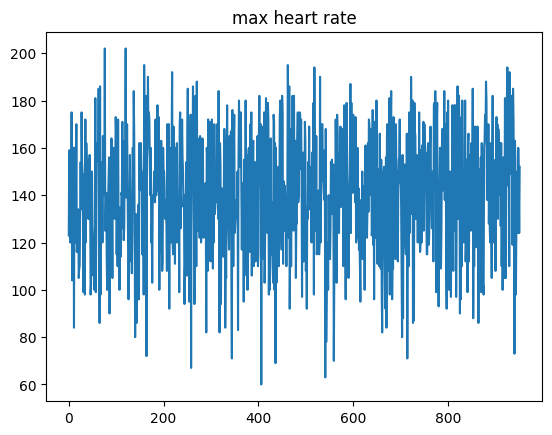

In [ ]:
plt.plot(train_df['max heart rate'])
plt.title('max heart rate')

<Axes: >

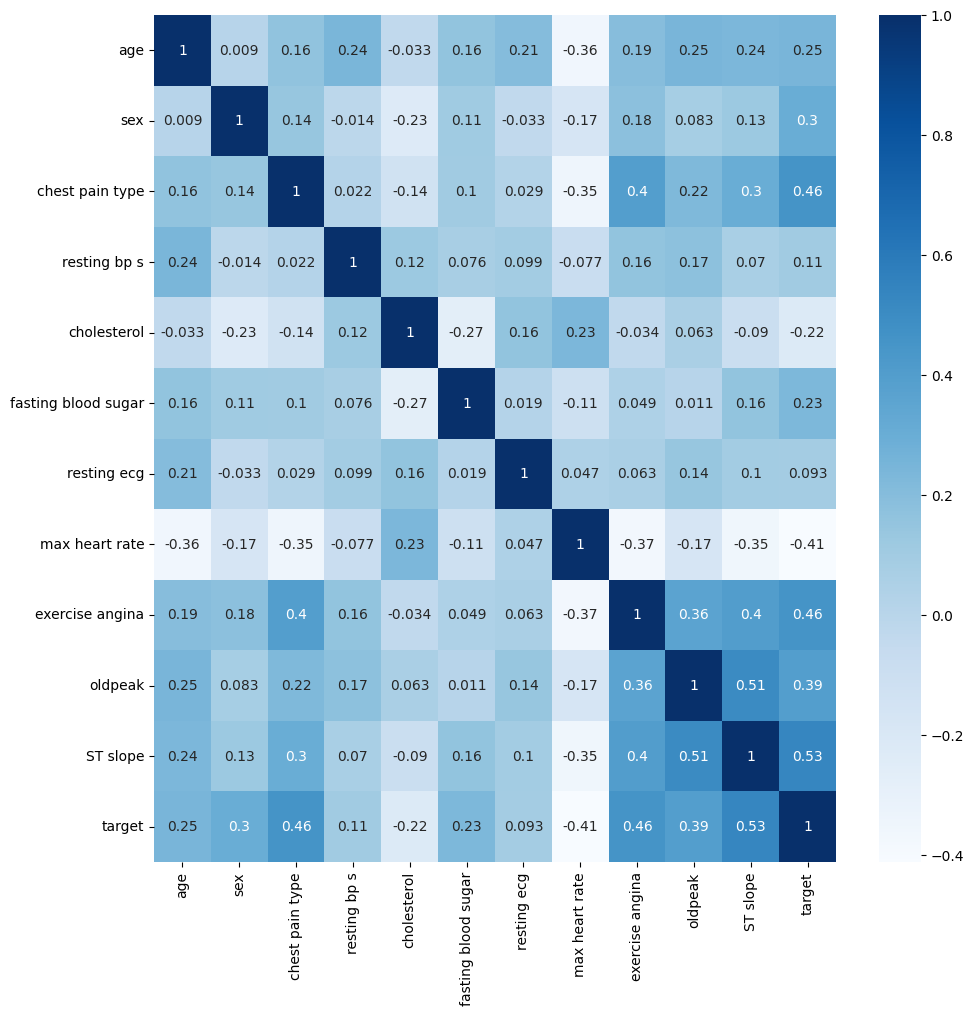

In [ ]:
#numeric_col = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak','target']
#numeric_df = train_df[numeric_col]


plt.figure(figsize=(11,11))
sns.heatmap(train_df.corr(), cmap='Blues' , annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

모델 training 용 (952개의 데이터 중 80%) -> train_X, train_y   

test용 (952개의 데이터 중 20%) -> test_X, test_y


In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y,test_size=0.2 ,random_state = 10)

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_X, train_y, epochs = 300,
                    batch_size = 10,
                    validation_data=(test_X, test_y),
                    )

Epoch 1/300
77/77 [==============================] - 22s 6ms/step - loss: 0.4800 - accuracy: 0.8055 - val_loss: 0.8827 - val_accuracy: 0.6597
Epoch 2/300
77/77 [==============================] - 0s 4ms/step - loss: 0.4204 - accuracy: 0.8226 - val_loss: 0.4892 - val_accuracy: 0.7906
Epoch 3/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4282 - accuracy: 0.8160 - val_loss: 0.5009 - val_accuracy: 0.8063
Epoch 4/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.8029 - val_loss: 0.4869 - val_accuracy: 0.8115
Epoch 5/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.8081 - val_loss: 1.0634 - val_accuracy: 0.6335
Epoch 6/300
77/77 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8095 - val_loss: 0.4704 - val_accuracy: 0.7906
Epoch 7/300
77/77 [==============================] - 0s 3ms/step - loss: 0.4939 - accuracy: 0.7976 - val_loss: 0.4945 - val_accuracy: 0.8168
Epoch 8/300


In [ ]:
loss, accuracy = model.evaluate(test_X, test_y)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

6/6 [==============================] - 0s 3ms/step - loss: 0.5872 - accuracy: 0.8063
Test Loss: 0.5872, Test Accuracy: 0.8063


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

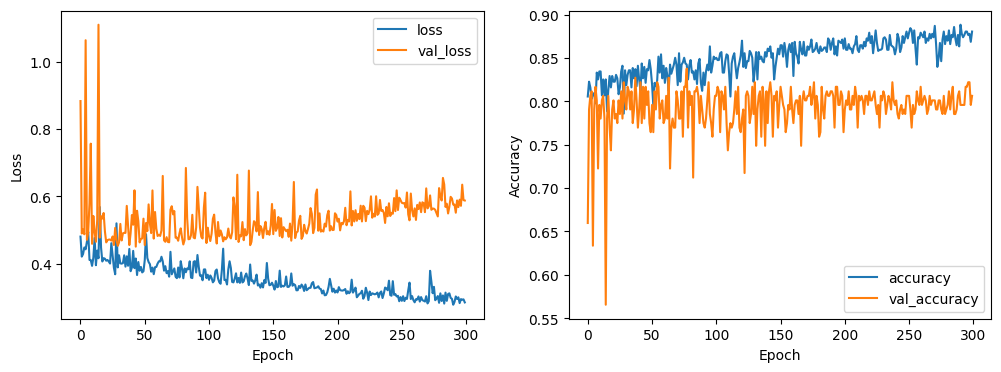

In [ ]:
# 학습 손실 및 정확도 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()